In [27]:
pip install scikit-learn opencv-python numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [107]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
def load_images_with_hog(data_path, img_size=(128, 128)):
    X = []
    y = []

    for file in os.listdir(data_path):
        if file.endswith(".jpg") or file.endswith(".png"):
            label = 0 if "cat" in file.lower() else 1
            path = os.path.join(data_path, file)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)

            # HOG feature extraction
            features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True)

            X.append(features)
            y.append(label)

    return np.array(X), np.array(y)




In [109]:
X, y = load_data("C:/Users/de/Downloads/archive (1)/train")
print("Total images:", len(X), "| Cats & Dogs:", np.bincount(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Total images: 557 | Cats & Dogs: [279 278]


In [110]:
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.001)
svm_rbf.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [111]:
y_pred = svm_rbf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.6607142857142857


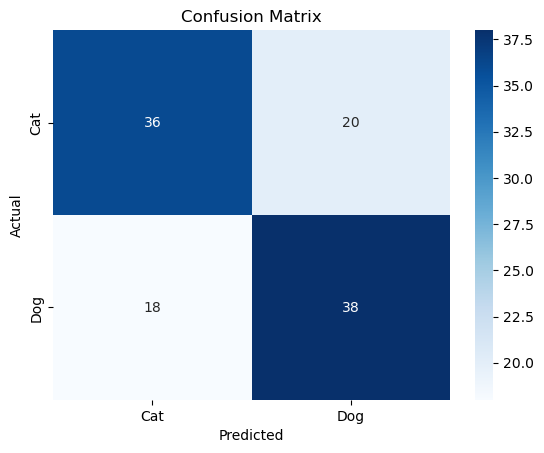

In [112]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()